<a href="https://colab.research.google.com/github/saiful1604008/Thesis/blob/main/comparison_model_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd
import numpy as np

In [24]:
dataset = pd.read_csv('/content/csv data.csv')

In [25]:
dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,198,199,200,201,202,203,204,205,206,207
0,-0.000047,-0.000030,0.000059,0.000007,-0.000052,-0.000007,0.000021,0.000026,-0.000052,0.000001,...,0.000033,0.000044,0.000039,0.000038,0.000056,0.000037,0.000048,0.000028,0.000033,0
1,-0.000042,-0.000026,0.000051,0.000006,-0.000050,-0.000008,0.000019,0.000027,-0.000049,0.000003,...,0.000030,0.000040,0.000032,0.000028,0.000050,0.000027,0.000043,0.000024,0.000030,0
2,-0.000036,-0.000025,0.000046,0.000004,-0.000046,-0.000007,0.000017,0.000026,-0.000046,0.000004,...,0.000032,0.000044,0.000039,0.000031,0.000051,0.000031,0.000039,0.000026,0.000032,0
3,0.000033,-0.000003,-0.000011,-0.000003,0.000006,0.000002,0.000004,0.000001,0.000012,-0.000006,...,0.000050,0.000027,0.000010,0.000015,0.000059,0.000040,0.000064,0.000077,0.000050,0
4,0.000016,0.000012,-0.000009,-0.000004,0.000006,0.000003,0.000003,0.000001,0.000009,-0.000006,...,0.000034,0.000017,0.000009,0.000013,0.000039,0.000031,0.000085,0.000058,0.000034,0


In [26]:
X = dataset.iloc[:, 0:207].values
y = dataset.iloc[:, 207].values

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [32]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((443, 207), (111, 207), (443,), (111,))

In [28]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [29]:
from sklearn.ensemble import RandomForestClassifier
regressor = RandomForestClassifier(n_estimators= 100, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [33]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
acc

0.8828828828828829

In [35]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[47  2]
 [11 51]]
              precision    recall  f1-score   support

           0       0.81      0.96      0.88        49
           1       0.96      0.82      0.89        62

    accuracy                           0.88       111
   macro avg       0.89      0.89      0.88       111
weighted avg       0.90      0.88      0.88       111



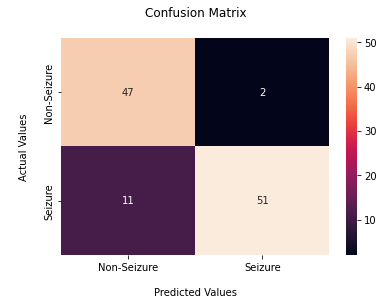

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.heatmap(confusion_matrix(y_test,y_pred), fmt = '' ,annot=True)
ax.set_title('Confusion Matrix\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('\nActual Values\n');
ax.xaxis.set_ticklabels(['Non-Seizure','Seizure'])
ax.yaxis.set_ticklabels(['Non-Seizure','Seizure'])
plt.show()

In [38]:
TP = 47
FN = 2
FP = 11
TN = 51

Precision = TP / (TP + FP)
Sensitivity = TP / (TP + FN)
Specificity = TN /(TN + FP)
False_Pos_Rate = FP / (TN + FP)
False_Neg_Rate = FN / (FN + TP)
F1_Score = (2*Precision*Sensitivity) / (Precision + Sensitivity)
Accuracy = (TP+TN) / (TP+FP+TN+FN)

precision = "{:.2f}".format(Precision)
sensitivity = "{:.2f}".format(Sensitivity)
specificity = "{:.2f}".format(Specificity)
false_pos_rate = "{:.2f}".format(False_Pos_Rate)
false_neg_rate = "{:.2f}".format(False_Neg_Rate)
f1_score = "{:.2f}".format(F1_Score)
accuracy = "{:.2f}".format(Accuracy)

print("Precision          :", precision)
print("Sensitivity        :", sensitivity)
print("Specificity        :", specificity)
print("F1-Score           :", f1_score)
print("False Positive Rate:", false_pos_rate)
print("False Negative Rate:", false_neg_rate)
print("Accuraccy          :", accuracy)

Precision          : 0.81
Sensitivity        : 0.96
Specificity        : 0.82
F1-Score           : 0.88
False Positive Rate: 0.18
False Negative Rate: 0.04
Accuraccy          : 0.88


In [39]:
from tabulate import tabulate

data = [["Precision", 0.81], 
        ["Sensitivity", 0.96], 
        ["Specificity", 0.82], 
        ["F1-Score", 0.88],
        ["False Positive Rate", 0.18],
        ["False Negative Rate", 0.04],
        ["Accuraccy",0.88 ]]

col_names = ["Performance Metrics", "Result"]
print(tabulate(data, headers=col_names, tablefmt="fancy_grid"))

╒═══════════════════════╤══════════╕
│ Performance Metrics   │   Result │
╞═══════════════════════╪══════════╡
│ Precision             │     0.81 │
├───────────────────────┼──────────┤
│ Sensitivity           │     0.96 │
├───────────────────────┼──────────┤
│ Specificity           │     0.82 │
├───────────────────────┼──────────┤
│ F1-Score              │     0.88 │
├───────────────────────┼──────────┤
│ False Positive Rate   │     0.18 │
├───────────────────────┼──────────┤
│ False Negative Rate   │     0.04 │
├───────────────────────┼──────────┤
│ Accuraccy             │     0.88 │
╘═══════════════════════╧══════════╛
